# Explore here

In [77]:
#En este primer EDA y teniendo en cuenta que no teniamos un objetivo claro, lo que he querido hacer ha sido buscar coincidencias entre precios, barrios y Hosts. 
#Además de practicar la limpieza de datos y las diferentes gráficas que hemos visto durante las clases. 
#También busque la relación entre el tipo de habitación y el precio según el barrio.

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv ("../data/raw/internal-link.csv")

df.head(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21293,Sunny Apartment in Artist Home,44145,Tyrome,Brooklyn,Bushwick,40.70093,-73.92609,Entire home/apt,105,3,118,2019-06-18,1.05,2,9
96,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,2019-07-07,0.71,1,198
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
98,21794,COZY QUIET room 4 DOOGLERS!,83257,Olan,Manhattan,Chelsea,40.74008,-74.00271,Private room,98,30,30,2019-05-01,0.27,2,364


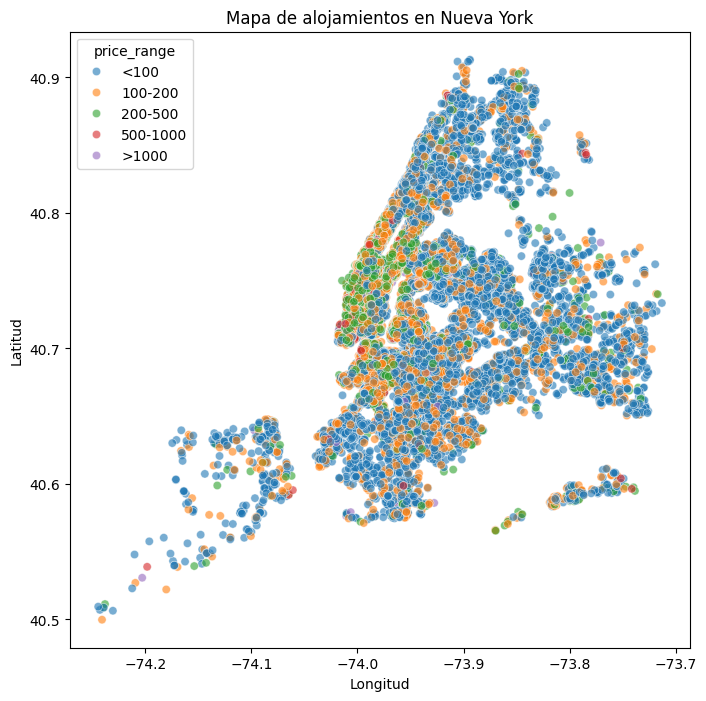

In [80]:
bins = [0, 100, 200, 500, 1000, 10000]
labels = ["<100", "100-200", "200-500", "500-1000", ">1000"]
df["price_range"] = pd.cut(df["price"], bins=bins, labels=labels)   # Crea una columna en df que transforma la variable continua 'price' en categórica por tramos

plt.figure(figsize=(8, 8))

sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    hue="price_range",            # color por precio
    alpha=0.6,              # transparencia para que no se sature
    legend=True
)

plt.title("Mapa de alojamientos en Nueva York")
plt.xlabel("Longitud")
plt.ylabel("Latitud")


plt.show()

In [81]:
#Con esta gráfica queria comprobar que los resultados de sobre las ubicaciones estaban todos aproximadamente en la misma zona y que ninguno se alejaba de Nueva York

In [82]:
# Top 10 hosts con más alojamientos
top_host = df["host_id"].value_counts().head(10)

# Top 10 barrios con más alojamientos
top_neighbourhood = df["neighbourhood"].value_counts().head(10)

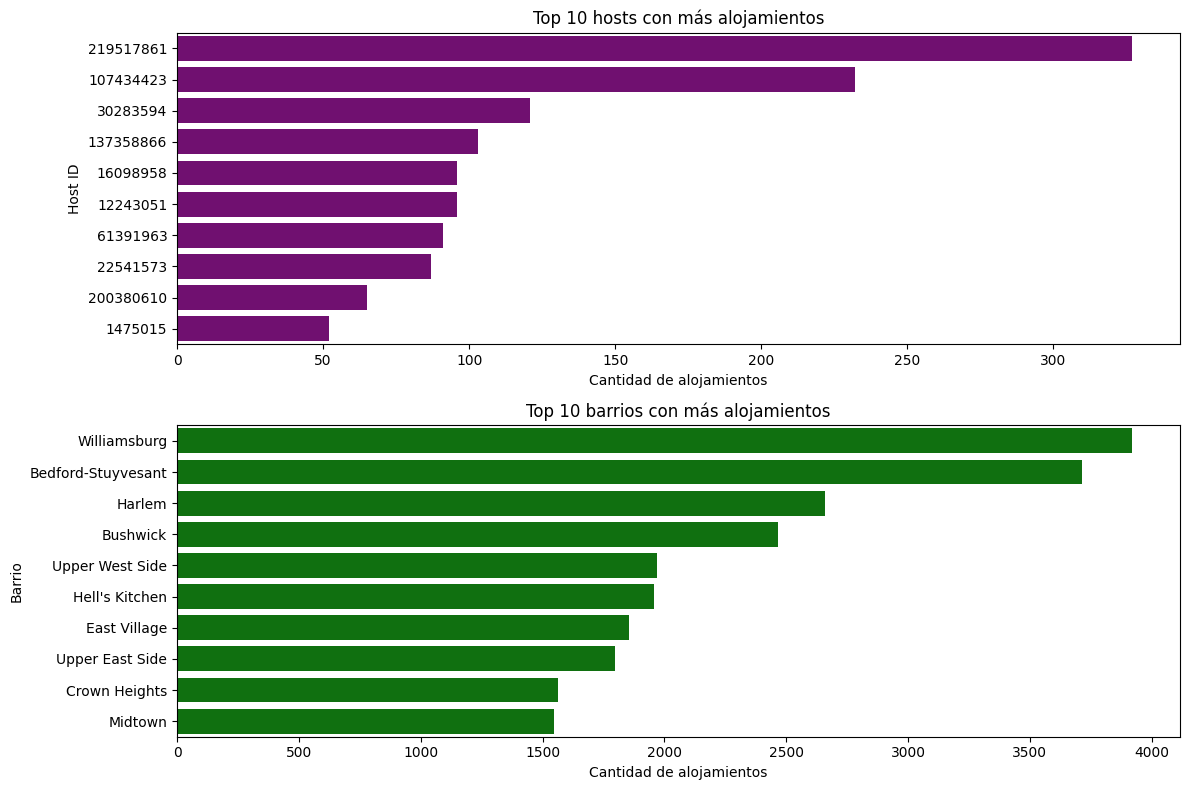

In [83]:
fig, axis = plt.subplots(2, 1, figsize=(12, 8))

# Top hosts
sns.barplot(
    ax=axis[0],
    x=top_host.values,
    y=top_host.index.astype(str),
    color="purple"
)
axis[0].set_title("Top 10 hosts con más alojamientos")
axis[0].set_xlabel("Cantidad de alojamientos")
axis[0].set_ylabel("Host ID")

# Top barrios
sns.barplot(
    ax=axis[1],
    x=top_neighbourhood.values,
    y=top_neighbourhood.index,
    color="green"  # reemplaza palette por un color fijo
)
axis[1].set_title("Top 10 barrios con más alojamientos")
axis[1].set_xlabel("Cantidad de alojamientos")
axis[1].set_ylabel("Barrio")

plt.tight_layout()
plt.show()

In [84]:
#Al tener una BBDD tan amplia, queria comprobar cuáles eran los top 10 barrios y IDs con más alojamientos.

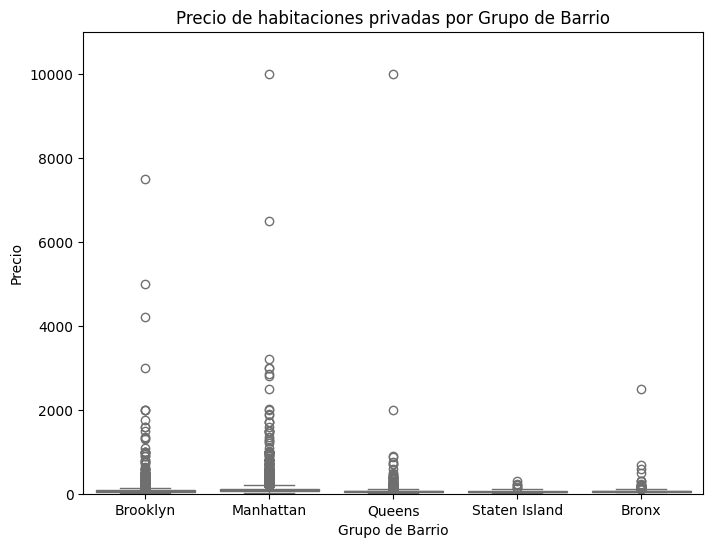

In [85]:
df["private_room"] = df["room_type"] == "Private room"

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df[df["private_room"]],
    x="neighbourhood_group",
    y="price",
    color="skyblue"  # reemplaza palette por un color fijo
)
plt.ylim(0, 11000)
plt.title("Precio de habitaciones privadas por Grupo de Barrio")
plt.xlabel("Grupo de Barrio")
plt.ylabel("Precio")
plt.show()

In [86]:
#De este modo, reconocia los precios y los barrios, lo que me podia dar una idea de aproximación de cuales eran los barrios más caros. 

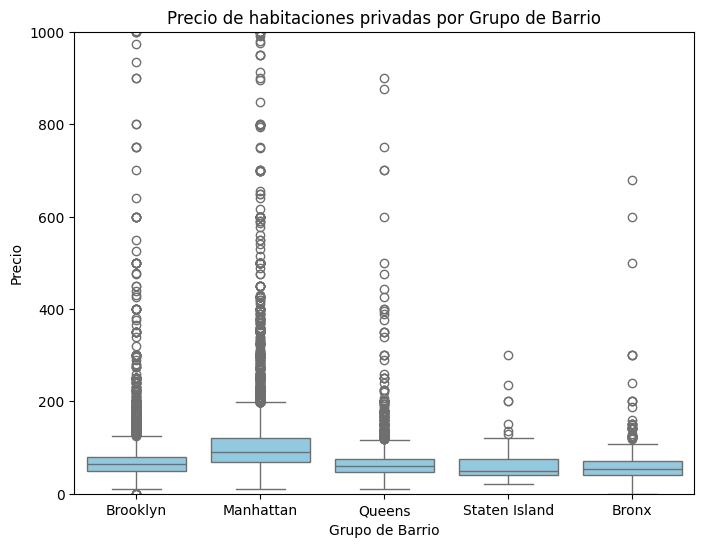

In [87]:
df["private_room"] = df["room_type"] == "Private room"

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df[df["private_room"]],
    x="neighbourhood_group",
    y="price",
    color="skyblue"  # reemplaza palette por un color fijo
)
plt.ylim(0, 1000)
plt.title("Precio de habitaciones privadas por Grupo de Barrio")
plt.xlabel("Grupo de Barrio")
plt.ylabel("Precio")
plt.show()

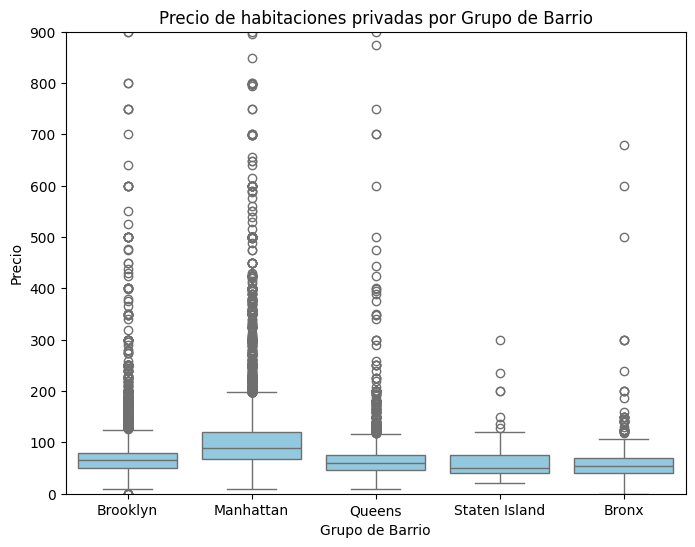

In [88]:
df["private_room"] = df["room_type"] == "Private room"

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df[df["private_room"]],
    x="neighbourhood_group",
    y="price",
    color="skyblue"  # reemplaza palette por un color fijo
)
plt.ylim(0, 900)
plt.title("Precio de habitaciones privadas por Grupo de Barrio")
plt.xlabel("Grupo de Barrio")
plt.ylabel("Precio")
plt.show()

In [89]:
#Fui ampliando el rango de precio para ir conociendo con más detalle todo. 

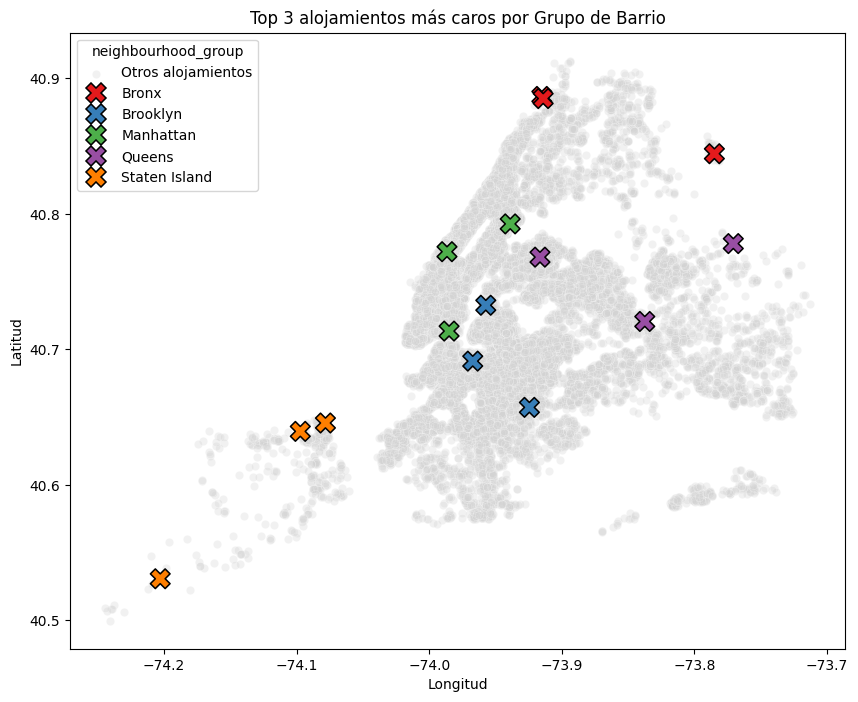

/tmp/ipykernel_9716/1546486397.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Grupo de Barrio")


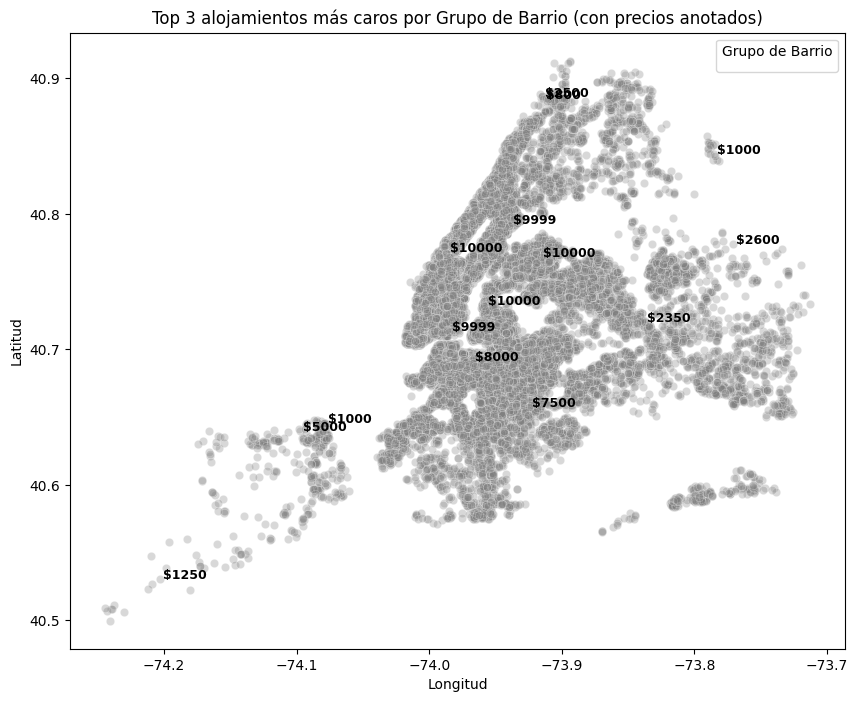

In [ ]:
#Ordenee por barrio y precio descendente
df_sorted = df.sort_values(["neighbourhood_group", "price"], ascending=[True, False])

#Seleccioné los top 3 por barrio usando groupby + head (sin apply)
top3_por_barrio = df_sorted.groupby("neighbourhood_group").head(3).reset_index(drop=True)


#Hice Mapa base de todos los alojamientos
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    alpha=0.3,
    color="lightgray",
    label="Otros alojamientos"
)

#Top 3
sns.scatterplot(
    data=top3_por_barrio,
    x="longitude",
    y="latitude",
    hue="neighbourhood_group",
    s=200,
    marker="X",
    edgecolor="black",
    palette="Set1",
    legend="full"
)

plt.title("Top 3 alojamientos más caros por Grupo de Barrio")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

#Mapa con los precios anotados

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    alpha=0.3,
    color="grey"
)

for i, row in top3_por_barrio.iterrows():

 plt.text(
        row["longitude"] + 0.002,
        row["latitude"],
        f"${row['price']}",
        fontsize=9,
        weight="bold",
        color="black"
    )

plt.title("Top 3 alojamientos más caros por Grupo de Barrio (con precios anotados)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Grupo de Barrio")
plt.show()


In [91]:
df.drop(["id", "name", "host_name", "latitude", "longitude"], axis = 1, inplace = True)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range,private_room
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,100-200,True
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200-500,False
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,100-200,True
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,<100,False
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,<100,False


In [92]:
df["neighbourhood_Group_N"] = pd.factorize(df["neighbourhood_group"])[0]
df.head(100)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_range,private_room,neighbourhood_Group_N
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,100-200,True,0
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,200-500,False,1
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,100-200,True,1
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,<100,False,0
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,<100,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44145,Brooklyn,Bushwick,Entire home/apt,105,3,118,2019-06-18,1.05,2,9,100-200,False,0
96,42032,Manhattan,Upper West Side,Entire home/apt,140,3,81,2019-07-07,0.71,1,198,100-200,False,1
97,82685,Manhattan,Harlem,Private room,89,1,1,2018-10-09,0.11,1,365,<100,True,1
98,83257,Manhattan,Chelsea,Private room,98,30,30,2019-05-01,0.27,2,364,<100,True,1


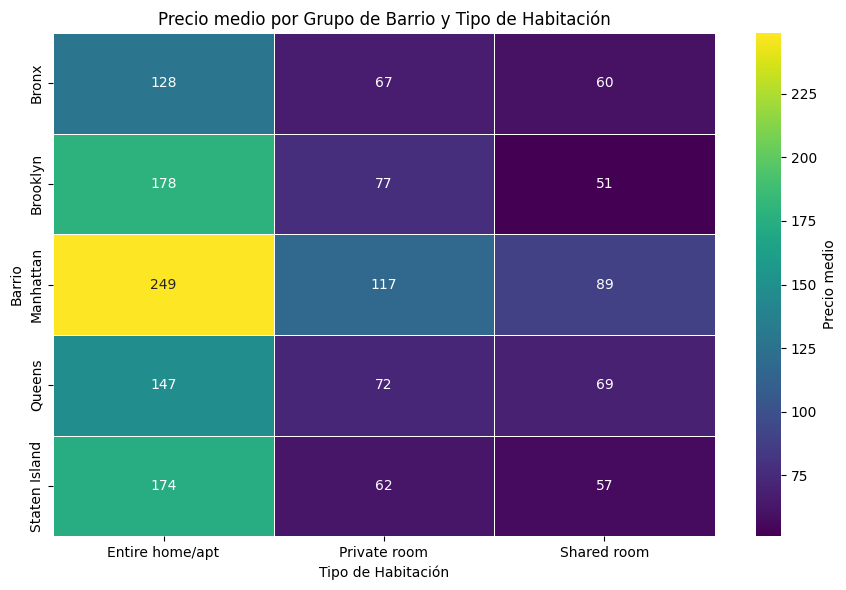

In [93]:
heat_df = (
    df
    .pivot_table(
        index="neighbourhood_group",
        columns="room_type",
        values="price",
        aggfunc="mean"
    )
    .round(0)   #redondeo
)

plt.figure(figsize=(9, 6))
ax = sns.heatmap(
    heat_df,
    annot=True,       #números en las celdas
    fmt=".0f",
    linewidths=.5,
    cmap="viridis",    #paleta de colores
    cbar_kws={"label": "Precio medio"}
)
ax.set_xlabel("Tipo de Habitación")
ax.set_ylabel("Barrio")
ax.set_title("Precio medio por Grupo de Barrio y Tipo de Habitación")
plt.tight_layout()
plt.show()

In [ ]:
#Con este mapa de calor, queria representar el precio medio por barrio en función del tipo de habitación, por lo que pude ver que Manhattan era el barrio más cara para alquilar apartamentos enteros.

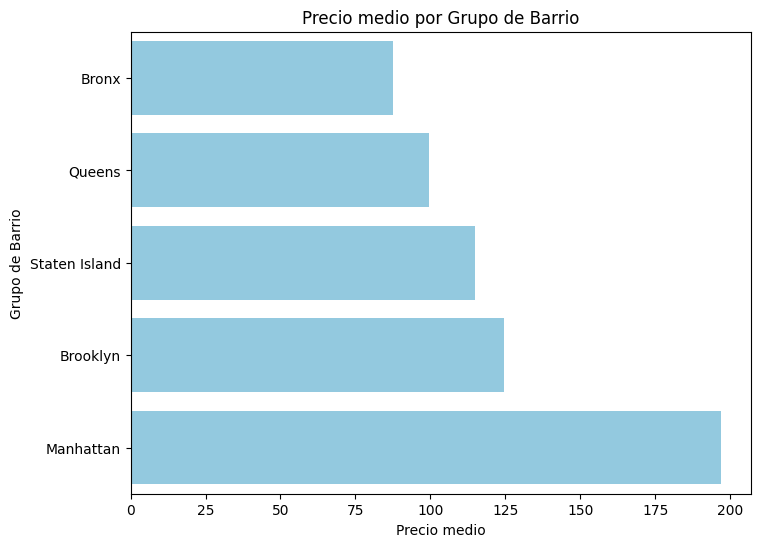

In [94]:
# Calcular precio medio por neighbourhood_group
precio_medio = df.groupby("neighbourhood_group")["price"].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(
    x=precio_medio.values,
    y=precio_medio.index,
    color="skyblue"  # color uniforme para evitar warnings
)
plt.title("Precio medio por Grupo de Barrio")
plt.xlabel("Precio medio")
plt.ylabel("Grupo de Barrio")
plt.show()


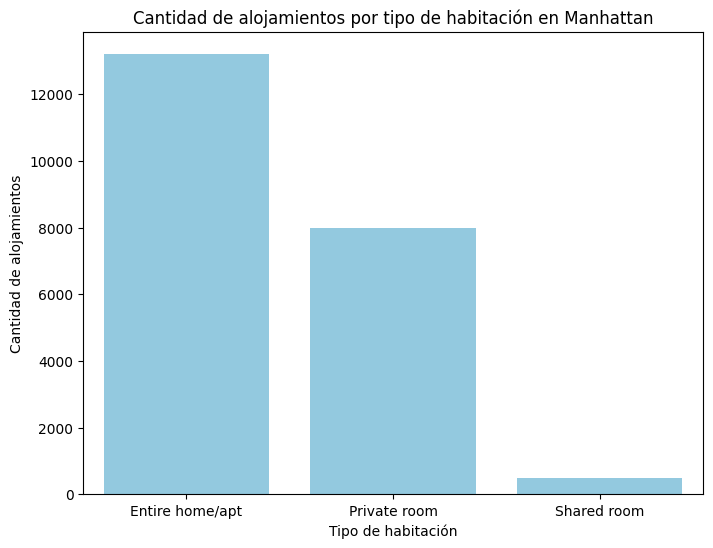

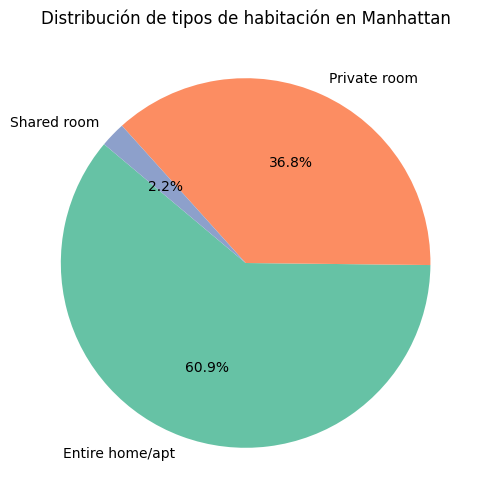

In [ ]:
#Solo quiero detenerme en Manhattan, por lo que decidí quedarme solo con este barrio
df_manhattan = df[df["neighbourhood_group"] == "Manhattan"]

#Conté el número de habitaciones
room_counts = df_manhattan["room_type"].value_counts()

#Hice la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(
    x=room_counts.index,
    y=room_counts.values,
    color="skyblue"
)
plt.title("Cantidad de alojamientos por tipo de habitación en Manhattan")
plt.xlabel("Tipo de habitación")
plt.ylabel("Cantidad de alojamientos")
plt.show()

#La mostré con otra gráfica distinta
plt.figure(figsize=(6, 6))
plt.pie(
    room_counts.values,
    labels=room_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
    startangle=140
)
plt.title("Distribución de tipos de habitación en Manhattan")
plt.show()
